In [1]:
import pandas as pd

df=pd.read_csv("d:/data/bmi/bmi.csv") #데이터 파일 로딩
df.head()

,height,weight,label
0,186,38,1
1,166,68,2
2,176,39,1
3,173,55,1
4,196,59,1


In [2]:
train_cols=df.columns[0:2]
X=df[train_cols] #독립변수
y=df["label"] #종속변수

In [3]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=["label"])
df2=pd.concat([X_samp,y_samp],axis=1)

In [4]:
#샘플링한 데이터셋에서 X,y 값 복사
X=df2[train_cols]
y=df2["label"]

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
#데이터셋을 학습용:검증용 8:2로 구분
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                              random_state=10)
model=DecisionTreeClassifier(max_depth=3,random_state=10) #트리 모형 생성
model.fit(X_train,y_train) #모형 훈련

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [14]:
print(model.score(X_train,y_train)) #학습용 데이터셋의 예측 정확도
print(model.score(X_test,y_test)) #검증용 데이터셋의 예측 정확도

0.7768536305615954
0.7740155928959441


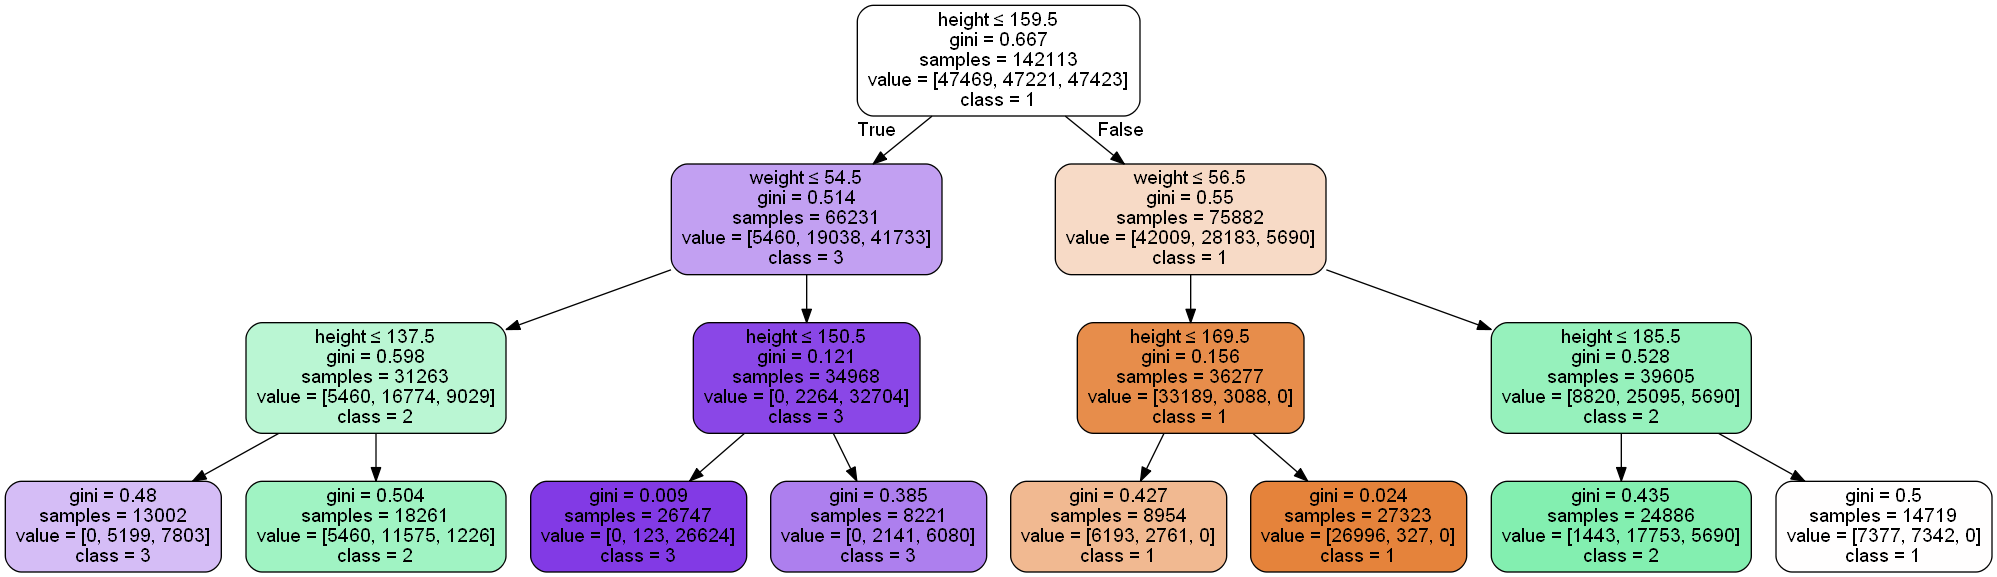

In [15]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image
#트리 모델 생성
dot_data=export_graphviz(model,out_file=None,
    feature_names=train_cols,class_names=["1","2","3"],
    filled=True,rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

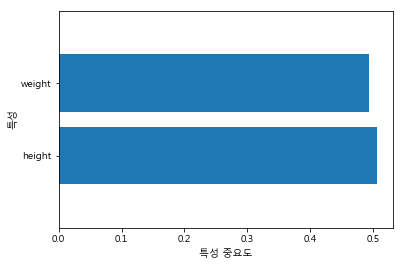

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(
    fname="c:/windows/fonts/malgun.ttf").get_name()
rc("font",family=font_name)


def plot_tree(model):
    n_features=X.shape[1] #독립변수의 갯수
    plt.barh(range(n_features),model.feature_importances_,
             align="center")
    plt.yticks(np.arange(n_features),train_cols) 
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1,n_features)
    
plot_tree(model)     #특성 중요도 그래프 출력
# 변수의 중요도 확인 : 신장 > 체중